# Réduction de dimension - Analyse linéaire discriminante (LDA)

LDA $\in$ ACI
1. La différence entre une ACP et une LDA est que LDA choisi sa zone de projection en fonction de la distance (et la moyennes ou la variance ?).
2. La fonction objective que l'on cherche à minimiser quand on fait une LDA est que l'on cherche a minimiser l'ecart enter les valeurs d'une même classes et a maximiser l'ecart entre les valeurs de 2 classes différante.

In [263]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import eig, inv
import warnings
warnings.filterwarnings("ignore")

## Exercice 1

In [264]:
from sklearn.datasets import load_wine
ds = load_wine()
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [265]:
print(ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [266]:
data = pa.DataFrame(ds.data, columns=ds.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [268]:
target = pa.DataFrame(ds.target, columns=["class"])

La taille du corpus du corpus est `178` et le nombre de variables est `13`.

In [269]:
dataset = pa.concat([data, target], axis=1)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [271]:
# shake data
dataset = dataset.sample(frac=1)

### LDA "à la main"

In [272]:
class_1_2 = dataset[dataset["class"] != 0]
X = class_1_2[["alcohol", "color_intensity"]]
Y = class_1_2["class"]

1. Les étapes :
   - On calcule les moyennes
   - On calcule les matrices de dispersion (scatter matrices)
   - On calcule la dispersion intra-classes
   - On calcule l'inverse de la matrice Sw
   - On calcule le vecteur de la meilleur direction
   - On projette les données

In [273]:
# On calcule les moyennes :
mu1 = np.mean(X[Y==1])
mu2 = np.mean(X[Y==2])
print(mu1)
print(mu2)

alcohol            12.278732
color_intensity     3.086620
dtype: float64
alcohol            13.15375
color_intensity     7.39625
dtype: float64


In [274]:
# On calcule les matrices de dispersion (scatter matrices)
S1 = (len(X[Y==1]) - 1) * X[Y==1].cov()
S2 = (len(X[Y==2]) - 1) * X[Y==2].cov()
print(S1)
print(S2)

                   alcohol  color_intensity
alcohol          20.258386         9.396896
color_intensity   9.396896        59.884589
                   alcohol  color_intensity
alcohol          13.214325        20.178875
color_intensity  20.178875       251.001320


In [275]:
# On calcule la dispersion intra-classes :
Sw = S1 + S2
print(Sw)

                   alcohol  color_intensity
alcohol          33.472711        29.575771
color_intensity  29.575771       310.885909


In [276]:
# On calcule l'inverse de la matrice Sw
invSw = inv(Sw)
print(invSw)

[[ 0.03261679 -0.00310296]
 [-0.00310296  0.00351181]]


In [277]:
# On calcule le vecteur de la meilleur direction
v = np.matmul(invSw, mu1 - mu2)
print(v)

[-0.01516765 -0.01241946]


In [278]:
# On projette les données
y = np.dot(v.T, X.T)
print(y)

[-0.2547265  -0.22143124 -0.32812446 -0.22762881 -0.21481454 -0.25476405
 -0.24928416 -0.25335241 -0.24170619 -0.28519698 -0.28067161 -0.22924334
 -0.21395313 -0.2219148  -0.24136845 -0.20899376 -0.252148   -0.1908962
 -0.22420948 -0.22802992 -0.22454722 -0.29046871 -0.29390862 -0.20349962
 -0.21608502 -0.27540257 -0.29787174 -0.20983775 -0.22556556 -0.28248107
 -0.33524274 -0.21421474 -0.31352926 -0.24351145 -0.24597581 -0.37895714
 -0.21924169 -0.26214754 -0.26122907 -0.23863301 -0.22471316 -0.2224269
 -0.26242447 -0.21303196 -0.23022848 -0.3279887  -0.22428982 -0.23391677
 -0.21473795 -0.2130605  -0.27138239 -0.31525898 -0.32181967 -0.30881197
 -0.25909133 -0.22154012 -0.21131487 -0.27929061 -0.20483512 -0.21746437
 -0.20486576 -0.24475339 -0.25324728 -0.28198324 -0.33664478 -0.29021658
 -0.23746661 -0.21486635 -0.22059251 -0.25453578 -0.25220146 -0.31157068
 -0.306605   -0.28776753 -0.21888127 -0.22404879 -0.22626056 -0.23035688
 -0.24289048 -0.24985484 -0.21017864 -0.25755129 -0.2

Le vecteur directeur du meilleur axe de projection selon la méthode LDA est `[-0.01516765 -0.01241946]`

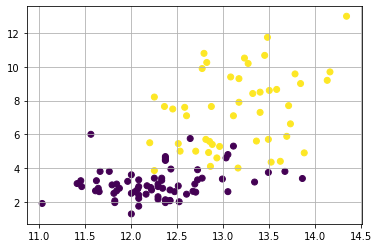

In [279]:
plt.grid()
plt.scatter(X["alcohol"], X["color_intensity"], c=Y)

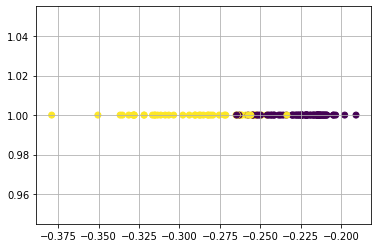

In [280]:
plt.grid()
plt.scatter(y, np.ones(len(y)), c=Y)

### LDA avec sklearn

1.0


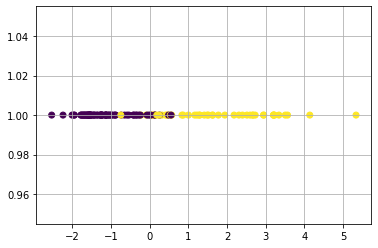

In [281]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print(lda.explained_variance_ratio_.sum())
plt.grid()
plt.scatter(X_lda, np.ones(len(X_lda)), c=Y)

### LDA sur tout le corpus

In [282]:
X = dataset.loc[:, dataset.columns != "class"]
Y = dataset["class"]

In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, Y).transform(X)

In [284]:
print(lda.explained_variance_ratio_.sum())

1.0


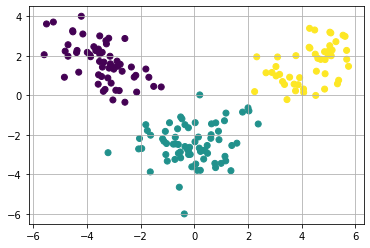

In [285]:
plt.grid()
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=Y)

### Classification
#### MAP

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

In [287]:
print("Sans réduction :")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

nb = GaussianNB()
t = time()
nb.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = nb.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Sans réduction :
time:  0.007519245147705078
100.00%


In [288]:
print("Avec réduction :")
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X, Y).transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, Y)

nb = GaussianNB()
t = time()
nb.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = nb.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Avec réduction :
time:  0.002550363540649414
100.00%


#### k-nn

In [289]:
from sklearn.neighbors import KNeighborsClassifier

In [290]:
print("Sans réduction :")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

knn = KNeighborsClassifier()
t = time()
knn.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = knn.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Sans réduction :
time:  0.024123191833496094
66.67%


In [291]:
print("Avec réduction :")
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X, Y).transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, Y)

knn = KNeighborsClassifier()
t = time()
knn.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = knn.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Avec réduction :
time:  0.0006694793701171875
100.00%


## Exercice 2

In [292]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z = scaler.fit_transform(X)
z

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [294]:
from sklearn.decomposition import PCA
acp = PCA()
coord = acp.fit_transform(z)
print(acp.n_components_)

30


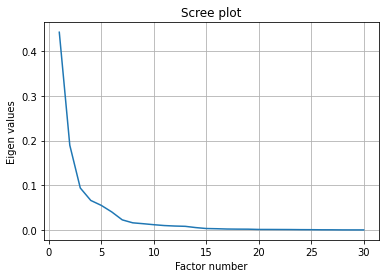

In [295]:
plt.grid()
plt.plot(np.arange(1, acp.n_components_ + 1), acp.explained_variance_ratio_)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

On vois que le pivot est a `3`

In [296]:
p = 3
acp = PCA(n_components=p)
coord = acp.fit_transform(z)
print(acp.explained_variance_ratio_.sum())

0.7263637090895578


### Impact

In [297]:
print("Sans réduction :")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

nb = GaussianNB()
t = time()
nb.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = nb.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Sans réduction :
time:  0.0014019012451171875
93.01%


#### Impact de l'ACP

In [298]:
print("Avec réduction :")
X_acp = coord
X_train, X_test, Y_train, Y_test = train_test_split(X_acp, Y)

nb = GaussianNB()
t = time()
nb.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = nb.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Avec réduction :
time:  0.001688241958618164
90.91%


#### Impact de l'LDA

In [299]:
print("Avec réduction :")
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, Y)

nb = GaussianNB()
t = time()
nb.fit(X_train, Y_train)
print("time: ", time() - t)

Y_pred = nb.predict(X_test)
print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

Avec réduction :
time:  0.0007150173187255859
97.20%
